# Pràctica III - ``PyTorch``

<a href="https://pytorch.org/"> ![PyTorch](https://pypi-camo.freetls.fastly.net/ed3839e1c11e779b508097969affa63d0968692b/68747470733a2f2f6769746875622e636f6d2f7079746f7263682f7079746f7263682f7261772f6d61696e2f646f63732f736f757263652f5f7374617469632f696d672f7079746f7263682d6c6f676f2d6461726b2e706e67) </a>


``PyTorch`` és una de les biblioteques més utilitzades actualment en l’àmbit de la intel·ligència artificial i l’aprenentatge automàtic. Desenvolupada inicialment per Facebook AI Research (FAIR), s’ha consolidat com una eina de referència per a investigadors i professionals gràcies a la seva flexibilitat, senzillesa d’ús i potència en el càlcul numèric.

Una de les grans fortaleses de ``PyTorch`` és el seu model de gràfic dinàmic (define-by-run). Això significa que la definició del flux de càlcul es construeix i s’executa de manera simultània, cosa que facilita el desenvolupament i la depuració de models complexos. Aquesta flexibilitat contrasta amb altres marcs que utilitzen gràfics estàtics, i ha fet que ``PyTorch`` sigui especialment popular en la recerca acadèmica.

En aquesta assignatura treballarem amb ``PyTorch`` per comprendre els fonaments de l’aprenentatge profund, implementar xarxes neuronals i experimentar amb diferents arquitectures.

### Conceptes claus

- Capa. Conjunt de perceptrons (neurones artificials) organitzats en paral·lel. Cada perceptró fa un càlcul sobre les entrades amb uns pesos i un biaix, i la capa combina totes aquestes sortides per generar la següent representació de les dades.
- Funcions d’activació. Introdueixen no-linealitat en les capes de la xarxa. Sense elles, la xarxa seria només una combinació lineal de perceptrons i no podria aprendre patrons complexos. Exemples habituals són ReLU, Sigmoid i Tanh
- Funció de pèrdua: mesura la diferència entre la sortida del model i la resposta desitjada; és la guia per saber si l’aprenentatge millora.
- Backpropagation: procés que calcula els gradients de la pèrdua respecte als paràmetres de la xarxa per saber com ajustar-los.
- Optimitzador: algoritme (com SGD o Adam) que actualitza els pesos de la xarxa segons els gradients, millorant progressivament el rendiment del model.


## Exemple

Entrenar i definir un model amb ``PyTorch`` és més complex que no amb ``scikit-learn``. Tot seguit un exemple amb dades sintètiques.

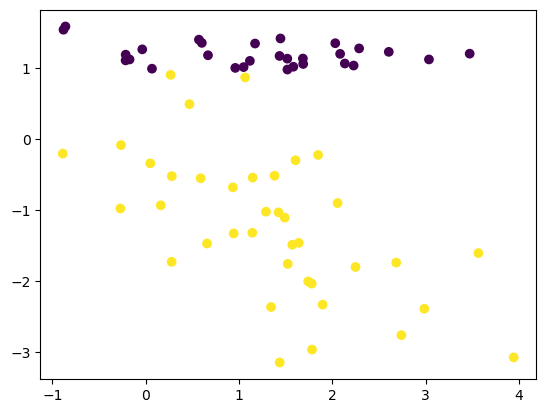

In [1]:
import copy

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F

# Generació del conjunt de mostres
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=1, class_sep=1.25,
                           random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.figure(1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=(y_train==0))  # Mostram el conjunt de mostres el color indica la classe
plt.show()

### Definim el model

En PyTorch, un model s’estructura com una classe que hereta de nn.Module. Aquesta classe conté:

1. El constructor (__init__): on es defineixen les capes del model (per exemple, nn.Linear, nn.Conv2d, etc.).
2. El mètode forward: que especifica com passen les dades a través de les capes i les funcions d’activació.

Això permet encapsular l’arquitectura de la xarxa de manera clara i reutilitzable.

Una capa lineal a PyTorch es defineix com:

```python
nn.Linear(in_features, out_features)
```

On:
``in_features``, és el nombre de valors que rep cada neurona de la capa (dimensió de l’entrada).
``out_features``, és el nombre de neurones de la capa (dimensió de la sortida).

La regla bàsica és que el nombre de sortides (``out_features``) d’una capa ha de coincidir amb el nombre d’entrades (``in_features`) de la següent.

In [2]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(2, 1)

    def forward(self, x):
        x = self.fc1(x) 
        x = F.sigmoid(x)

        return x

### Entrenament

Entrenar una xarxa neuronal com un MLP implica uns quants passos essencials: forward pass, càlcul de la pèrdua, backpropagation i actualització dels paràmetres. PyTorch ofereix una manera flexible i modular de gestionar aquest procés.

---


### 1. Escollir una funció de pèrdua

La **funció de pèrdua** mesura la diferència entre les prediccions del model i les etiquetes reals.

Per a tasques de classificació:

```python
criterion = nn.CrossEntropyLoss()
```

---

### 2. Seleccionar un optimitzador

Un optimitzador actualitza els paràmetres del model utilitzant els gradients calculats durant el backpropagation.

Exemple amb descens estocàstic de gradient (SGD):

```python
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
```

**Adam**:
```python
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
```

---

### 3. Bucle d’entrenament

Aquest és el nucli del procés d’entrenament. Per a cada època (un recorregut complet pel conjunt de dades), es realitza:

#### a. Forward Pass

Es calculen les prediccions del model:

```python
outputs = model(inputs)
```

#### b. Funció de pèrdua
Es calcula la distància entre les predicció i el *ground truth*:

```python
loss = criterion(outputs, targets)
```

#### c. Backward Pass
Es calculen els gradients de la pèrdua respecte als paràmetres del model:

```python
loss.backward()
```

#### d. Actualització de paràmetres
S’apliquen els gradients per actualitzar els paràmetres del model:
```python
optimizer.step()
```

#### e. Reiniciam els Gradients
Netejam els gradients abans de la nova iteració:
```python
optimizer.zero_grad()
```

**Exemple tot junt**:
```python
for epoch in range(num_epochs):
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
```

#### 4. Evaluació

Una vegada entrenat volem avaluar el model amb el conjunt de validació. En aquest cas no volem guardar cap informació del gradient, per això emprarem la instrucció ``torch.no_grad()``.

```python
model.eval()
with torch.no_grad():
    predictions = model(test_inputs)
```

---

## Resum

| Pas                | Propòsit                                           |
|--------------------|---------------------------------------------------|
| Funció de pèrdua   | Mesurar l’error de predicció                      |
| Optimitzador       | Actualitzar els pesos utilitzant els gradients   |
| Forward Pass       | Predir les sortides                               |
| Pèrdua + Backward  | Calcular els gradients                             |
| Pas de l’optimitzador | Ajustar els pesos                               |
| Zero Grad          | Evitar l’acumulació de gradients                  |
| Avaluació          | Provar el rendiment sense calcular gradients      |



In [3]:
LR = 1e-3
EPOCHS = 1000

criterion = nn.BCELoss()

In [4]:
best_acc = 0
best_weights = None

losses = []
accuracy = []

net = MLP()
optimizer = torch.optim.Adam(net.parameters(), lr=LR)

X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).view(-1, 1).float() # Use .view() for reshaping
X_test_tensor = torch.from_numpy(X_test).float()


for epoch in range(EPOCHS):
    net.train()
    
    output = net(X_train_tensor)
    loss = criterion(output, y_train_tensor) 

    losses.append(loss.item()) 

    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()

    net.eval()
    
    output_val = net(X_test_tensor)

    
    train_preds = (output.detach().numpy() > 0.5).astype(int)
    val_preds = (output_val.detach().numpy() > 0.5).astype(int)
    
    
    acc = accuracy_score(y_train, train_preds)
    acc_val = accuracy_score(y_test, val_preds)
    
    
    if acc_val > best_acc:
        best_acc = acc_val 
        best_weights = copy.deepcopy(net.state_dict())

    accuracy.append(acc_val)
    
net.load_state_dict(best_weights)

print(acc_val)

0.9696969696969697


In [5]:
accuracy

[0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9393939393939394,
 0.9393939393939394,
 0.9393939393939394,
 0.9393939393939394,
 0.9393939393939394,
 0.9393939393939394,
 0.9393939393939394,
 0.9393939393939394,
 0.9393939393939394,
 0.9393939393939394,
 0.9393939393939394,
 0.9393939393939394,
 0.9393939393939394,
 0.9393939393939394,
 0.9393939393939394,
 0.9393939393939394,
 0.9393939393939394,
 0.9393939393939394,
 0.9393939393939394,
 0.9393939393939394,
 0.9393939393

## Tasca a fer

1. Modificar el model per afegir dues capes més lineals. Millora els resultats respecte el perceptró?
2. Entrenar un model amb el conjunt de dades del Titanic que vàrem treballar a la sessió anterior.

In [6]:
class MLP3(nn.Module):
    def __init__(self):
        super(MLP3, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 7)
        self.fc3 = nn.Linear(7, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))

        return x

In [7]:
best_acc = 0
best_weights = None

losses = []
accuracy = []

net = MLP3()
optimizer = torch.optim.Adam(net.parameters(), lr=LR)

X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).view(-1, 1).float()
X_test_tensor = torch.from_numpy(X_test).float()


for epoch in range(EPOCHS):
    net.train()
    
    output = net(X_train_tensor)
    loss = criterion(output, y_train_tensor) 

    losses.append(loss.item()) 

    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()

    net.eval()
    
    output_val = net(X_test_tensor)

    
    train_preds = (output.detach().numpy() > 0.5).astype(int)
    val_preds = (output_val.detach().numpy() > 0.5).astype(int)
    
    
    acc = accuracy_score(y_train, train_preds)
    acc_val = accuracy_score(y_test, val_preds)
    
    
    if acc_val > best_acc:
        best_acc = acc_val 
        best_weights = copy.deepcopy(net.state_dict())

    accuracy.append(acc_val)
    
net.load_state_dict(best_weights)

print(acc_val)

0.9696969696969697


In [8]:
import pandas as pd

train = pd.read_csv('/Users/dylancanning/Desktop/UIB/AprenentatgeAutomatic/aa_2526/02_Solucio/titanic/train.csv')
test = pd.read_csv('/Users/dylancanning/Desktop/UIB/AprenentatgeAutomatic/aa_2526/02_Solucio/titanic/test.csv')

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train = pd.get_dummies(train, columns=["Sex", "Embarked"])
test = pd.get_dummies(test, columns=["Sex", "Embarked"])
train = train.fillna(train.mean(numeric_only=True))
test = test.fillna(test.mean(numeric_only=True))
train.drop(columns=["Cabin", "Name"])
test.drop(columns=["Cabin", "Name"])

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.50000,0,0,330911,7.8292,False,True,False,True,False
1,893,3,47.00000,1,0,363272,7.0000,True,False,False,False,True
2,894,2,62.00000,0,0,240276,9.6875,False,True,False,True,False
3,895,3,27.00000,0,0,315154,8.6625,False,True,False,False,True
4,896,3,22.00000,1,1,3101298,12.2875,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,A.5. 3236,8.0500,False,True,False,False,True
414,1306,1,39.00000,0,0,PC 17758,108.9000,True,False,True,False,False
415,1307,3,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,False,True,False,False,True
416,1308,3,30.27259,0,0,359309,8.0500,False,True,False,False,True


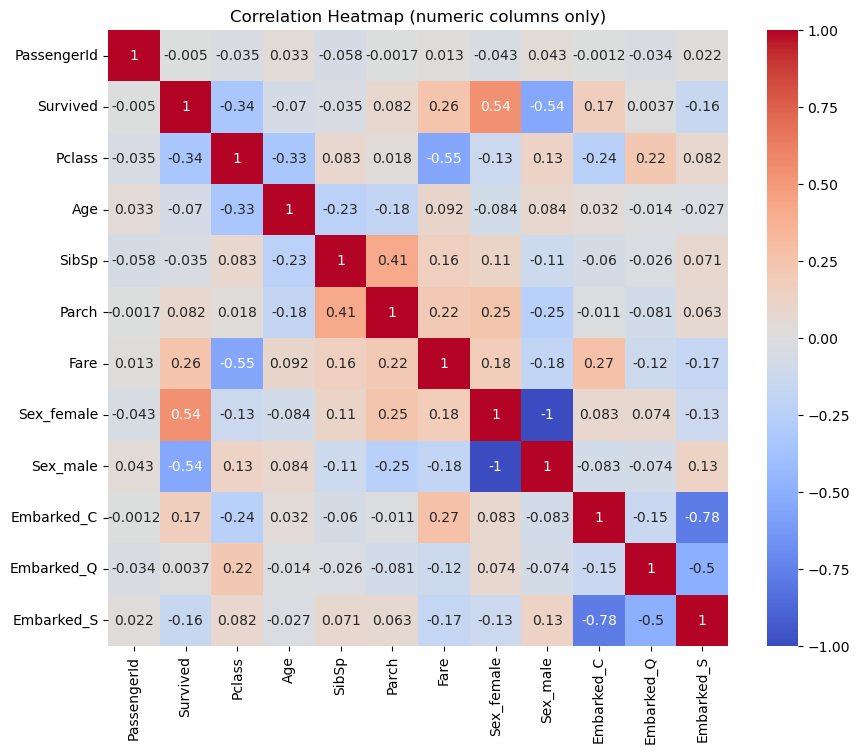

In [10]:
corr = train.select_dtypes(include=["number", "bool"]).corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (numeric columns only)")
plt.show()

In [11]:
train = train.drop('Cabin', axis=1)
test = test.drop('Cabin', axis=1)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = pd.DataFrame(
    scaler.fit_transform(train.select_dtypes(include="number")),
    columns=train.select_dtypes(include="number").columns
)

train_normalized = pd.concat([train_scaled, train.select_dtypes(exclude="number")], axis=1)

train_normalized.drop(columns=["Name", "Ticket"])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.000000,0.0,1.0,0.271174,0.125,0.000000,0.014151,False,True,False,False,True
1,0.001124,1.0,0.0,0.472229,0.125,0.000000,0.139136,True,False,True,False,False
2,0.002247,1.0,1.0,0.321438,0.000,0.000000,0.015469,True,False,False,False,True
3,0.003371,1.0,0.0,0.434531,0.125,0.000000,0.103644,True,False,False,False,True
4,0.004494,0.0,1.0,0.434531,0.000,0.000000,0.015713,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.995506,0.0,0.5,0.334004,0.000,0.000000,0.025374,False,True,False,False,True
887,0.996629,1.0,0.0,0.233476,0.000,0.000000,0.058556,True,False,False,False,True
888,0.997753,0.0,1.0,0.367921,0.125,0.333333,0.045771,True,False,False,False,True
889,0.998876,1.0,0.0,0.321438,0.000,0.000000,0.058556,False,True,True,False,False


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test_scaled = pd.DataFrame(
    scaler.fit_transform(test.select_dtypes(include="number")),
    columns=test.select_dtypes(include="number").columns
)

test_normalized = pd.concat([test_scaled, test.select_dtypes(exclude="number")], axis=1)

test_normalized.drop(columns=["Name", "Ticket"])

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.000000,1.0,0.452723,0.000,0.000000,0.015282,False,True,False,True,False
1,0.002398,1.0,0.617566,0.125,0.000000,0.013663,True,False,False,False,True
2,0.004796,0.5,0.815377,0.000,0.000000,0.018909,False,True,False,True,False
3,0.007194,1.0,0.353818,0.000,0.000000,0.016908,False,True,False,False,True
4,0.009592,1.0,0.287881,0.125,0.111111,0.023984,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
413,0.990408,1.0,0.396975,0.000,0.000000,0.015713,False,True,False,False,True
414,0.992806,0.0,0.512066,0.000,0.000000,0.212559,True,False,True,False,False
415,0.995204,1.0,0.505473,0.000,0.000000,0.014151,False,True,False,False,True
416,0.997602,1.0,0.396975,0.000,0.000000,0.015713,False,True,False,False,True


In [14]:
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
bool_cols = train_normalized.select_dtypes(include='bool').columns
train_normalized[bool_cols] = train_normalized[bool_cols].astype(int)

X = train_normalized[features].values
y = train_normalized['Survived'].values

X_train, X_val, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_test.shape)

(712, 10)
(712,)
(179, 10)
(179,)


In [16]:
class MLP_Titanic(nn.Module):
    def __init__(self):
        super(MLP_Titanic, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 7)
        self.fc3 = nn.Linear(7, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))

        return x

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.nn.functional as F
import copy

# --- 1. Data Preparation ---
train_df = pd.read_csv('/Users/dylancanning/Desktop/UIB/AprenentatgeAutomatic/aa_2526/02_Solucio/titanic/train.csv')
test_df = pd.read_csv('/Users/dylancanning/Desktop/UIB/AprenentatgeAutomatic/aa_2526/02_Solucio/titanic/test.csv')

# Preprocessing
for df in [train_df, test_df]:
    df.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)
    df.fillna(df.select_dtypes(include="number").mean(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)

features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = train_df[features].values
y = train_df['Survived'].values

# Scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 2. Define the Model ---
# The input layer must match the number of features (which is 8)
class MLP_Titanic(nn.Module):
    def __init__(self, input_features=8):
        super(MLP_Titanic, self).__init__()
        self.fc1 = nn.Linear(input_features, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# --- 3. Training Loop ---
LR = 1e-3
EPOCHS = 1000
criterion = nn.BCELoss()

# Convert data to tensors
X_train_t = torch.from_numpy(X_train).float()
y_train_t = torch.from_numpy(y_train).view(-1, 1).float()
X_test_t = torch.from_numpy(X_test).float()
y_test_t = torch.from_numpy(y_test).view(-1, 1).float()

best_acc = 0
best_weights = None
net = MLP_Titanic(input_features=X_train_t.shape[1]) # Pass the correct number of features
optimizer = torch.optim.Adam(net.parameters(), lr=LR)

for epoch in range(EPOCHS):
    net.train()
    
    output = net(X_train_t)
    loss = criterion(output, y_train_t)

    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()

    net.eval()
    
    # Validation step
    with torch.no_grad():
        output_val = net(X_test_t)
        val_loss = criterion(output_val, y_test_t)
        
        # Accuracy calculation
        val_preds = (output_val > 0.5).int()
        acc_val = accuracy_score(y_test_t, val_preds)

    if acc_val > best_acc:
        best_acc = acc_val
        best_weights = copy.deepcopy(net.state_dict())

net.load_state_dict(best_weights)

print(f"Best validation accuracy: {best_acc:.4f}")

/var/folders/4p/rs128k3j0_l38wrfg8z1qwj00000gn/T/ipykernel_1771/3943723344.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
/var/folders/4p/rs128k3j0_l38wrfg8z1qwj00000gn/T/ipykernel_1771/3943723344.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

Best validation accuracy: 0.8324
